In [1]:
from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib
import matplotlib.pyplot as plt
import numpy as np
import glob
import librosa

In [58]:
# Load Model
model = joblib.load("11042018_randomforest_drones_background_n_mfcc_100.pkl")

In [59]:
model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [41]:
# Load Data
f_format = "/*.wav"
directory = ""
#test_path = "/Users/junhyuckwoo/capstone/TestFile/Data/DistanceTest/mavic/*.wav"
test_path = "/Users/junhyuckwoo/capstone/TestFile/testing" + directory + f_format
test_files = glob.glob(test_path)
files_num = len(test_files)
print("# Test filest: ", files_num)

# Test filest:  12


In [42]:
# Input daata Preprocessing
raw, sr = librosa.load(test_files[11], sr=44100)
norm = maxabs_scale(raw)
data= librosa.feature.mfcc(norm, sr=44100, n_mfcc=13).T
# Checking for debugging
print("Data Shape", data.shape)

Data Shape (888, 13)


In [43]:
 label = np.ones(len(data))*0

In [44]:
test = data
y = label

In [60]:
prediction = model.predict(test)

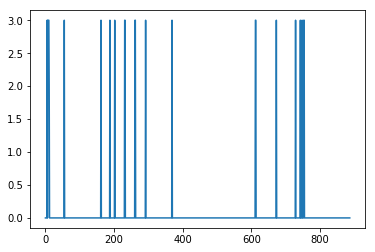

In [61]:
plt.plot(prediction)

In [57]:
from sklearn.metrics import precision_recall_fscore_support
p,r,f,s = precision_recall_fscore_support(y, prediction, average='micro')
print("F-Score:", round(f,3))
from sklearn.metrics import accuracy_score
print("Accuracy: ", accuracy_score(y, prediction))
from sklearn.metrics import classification_report
print(classification_report(y, prediction))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y, prediction))

F-Score: 0.976
Accuracy:  0.9763513513513513
             precision    recall  f1-score   support

        0.0       1.00      0.98      0.99       888
        2.0       0.00      0.00      0.00         0
        3.0       0.00      0.00      0.00         0

avg / total       1.00      0.98      0.99       888

[[867   1  20]
 [  0   0   0]
 [  0   0   0]]


/Users/junhyuckwoo/capstone/lib/python3.5/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
